In [1]:
import simulation_experiments
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score

# Varying Edge Density Inside the Clusters
## the setting up is simmilar to the paper, but at the end, use normalized_mutual_info_score to evaluate the performance
## 1 is the perfect score, while 0 is the worst score

In [2]:
def simulation(p, r, mode):
    score = np.zeros((3,len(p)))
    for count, value in enumerate(p):
        score_E = 0
        score_tb = 0
        score_te = 0
        for j in range(5):
            (adj_E, adj_tb, adj_te, true_label) = simulation_experiments.data_generation(450, 3, r, value, 0.25, mode).get_parameters()
            sc = SpectralClustering(3, affinity='precomputed', n_init=100, assign_labels='discretize')
            r1 = sc.fit_predict(adj_E) 
            r2 = sc.fit_predict(adj_tb)
            r3 = sc.fit_predict(adj_te)
            score_E += normalized_mutual_info_score(r1, true_label)
            score_tb += normalized_mutual_info_score(r2, true_label)
            score_te += normalized_mutual_info_score(r3, true_label)
        score[0, count] = score_E/5
        score[1, count] = score_tb/5
        score[2, count] = score_te/5
        
    return score

In [3]:
def plot(p, score):
    plt.plot(p, score[0,:], 'ro--', label='E')
    plt.plot(p, score[1,:], 'bo--', label='Tb')
    plt.plot(p, score[2,:], 'go--', label='Te')
    plt.ylabel('NMI')
    plt.legend()

## One Coin, r=0.15, q=1-p

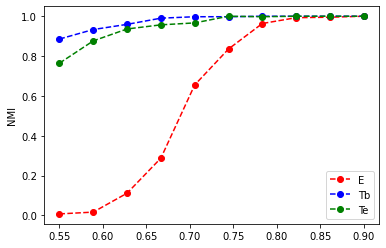

In [45]:
p = np.linspace(0.55, 0.9, num=10)
score_1=simulation(p, 0.15, 1)
plot(p, score_1)

## TBM, r=0.15, q=0.25

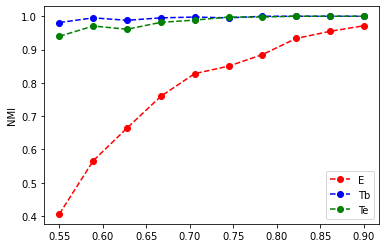

In [5]:
score_2=simulation(p, 0.15, 2)
plot(p, score_2)

## CBM, r=0.15, q=0.25

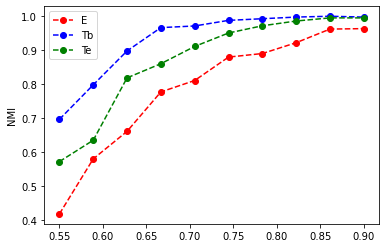

In [6]:
score_3=simulation(p, 0.15, 3)
plot(p, score_3)

## One Coin, r=0.3, q=1-p

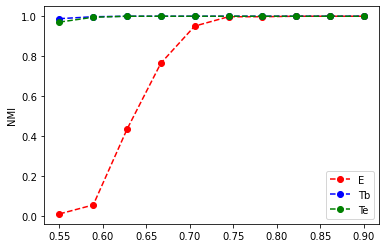

In [7]:
score_4=simulation(p, 0.3, 1)
plot(p, score_4)

## TBM, r=0.3, q=0.25

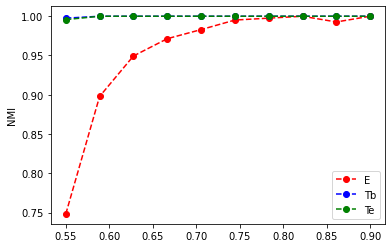

In [8]:
score_5=simulation(p, 0.3, 2)
plot(p, score_5)

## CBM, r=0.3, q=0.25

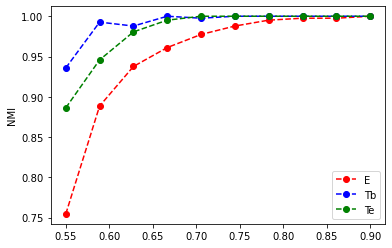

In [9]:
score_6=simulation(p, 0.3, 3)
plot(p, score_6)

# Varying Cluster Sizes
## the setting up is simmilar to the paper, but at the end, use adjusted_mutual_info_score to evaluate the performance (using adjusted MI to account for the changes of the cluster size)  
## 1 is the perfect score, while closer to 0 is the bad score

In [22]:
def simulation(s, r, mode):
    score = np.zeros((3,len(s)))
    for count, value in enumerate(s):
        score_E = 0
        score_tb = 0
        score_te = 0
        for j in range(5):
            (adj_E, adj_tb, adj_te, true_label) = simulation_experiments.data_generation(1200, value, r, 0.7, 0.25, mode).get_parameters()
            sc = SpectralClustering(3, affinity='precomputed', n_init=100, assign_labels='discretize')
            r1 = sc.fit_predict(adj_E) 
            r2 = sc.fit_predict(adj_tb)
            r3 = sc.fit_predict(adj_te)
            score_E += adjusted_mutual_info_score(r1, true_label)
            score_tb += adjusted_mutual_info_score(r2, true_label)
            score_te += adjusted_mutual_info_score(r3, true_label)
        score[0, count] = score_E/5
        score[1, count] = score_tb/5
        score[2, count] = score_te/5
        
    return score

In [20]:
def plot_(s, score):
    plt.plot(s, score[0,:], 'ro--', label='E')
    plt.plot(s, score[1,:], 'bo--', label='Tb')
    plt.plot(s, score[2,:], 'go--', label='Te')
    plt.ylabel('AMI')
    plt.legend()

## One Coin, r=0.2, p=1-q=0.7

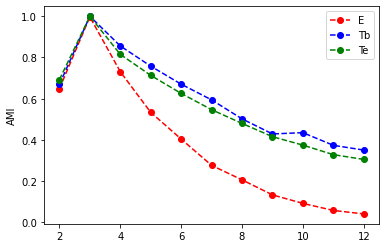

In [23]:
s = np.array(range(2,13))
score_1=simulation(s, 0.2, 1)
plot_(s, score_1)

## TBM, r=0.2, p=0.7, q=0.25

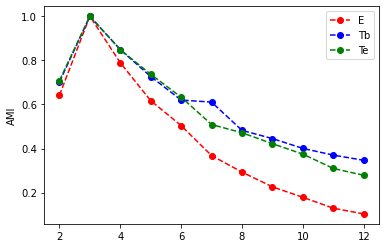

In [24]:
score_2=simulation(s, 0.2, 2)
plot(s, score_2)

## CBM, r=0.2, p=0.7, q=0.25

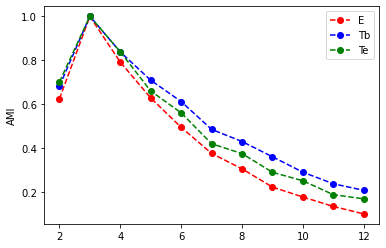

In [25]:
score_3=simulation(s, 0.2, 3)
plot(s, score_3)

## One Coin, r=0.3, p=1-q=0.7

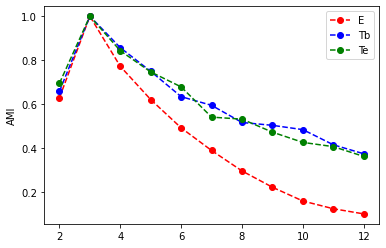

In [26]:
score_4=simulation(s, 0.3, 1)
plot(s, score_4)

## TBM, r=0.3, p=0.7, q=0.25

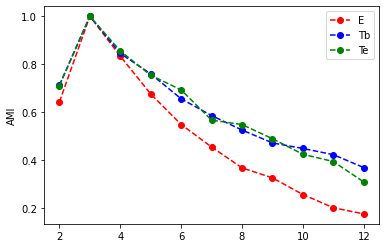

In [27]:
score_5=simulation(s, 0.3, 2)
plot(s, score_5)

## CBM, r=0.3, p=0.7, q=0.25

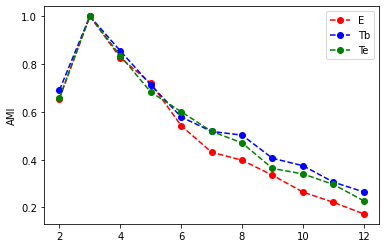

In [28]:
score_6=simulation(s, 0.3, 3)
plot(s, score_6)